In [55]:
import pandas as pd

train_set = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test_set = pd.read_csv('/content/sample_data/mnist_test.csv')

In [56]:
train_value = train_set.values
train_value


array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

In [57]:
test_value = test_set.values

testing = torch.tensor(test_value)

label_test = testing.T[0]
test_set = testing.T[1:]

test_set = test_set.T
test_set_res = test_set.view(test_set.shape[0],28,28)
print(test_set_res.shape)


label_test = label_test.reshape(-1,1)
label_test.shape

torch.Size([9999, 28, 28])


torch.Size([9999, 1])

In [58]:
import torch
from torch.utils.data import DataLoader

training = torch.tensor(train_value)

label = training.T[0]
train_set = training.T[1:]



In [59]:
print(train_set.shape)
train_set = train_set.T
train_set_res = train_set.view(19999,28,28)
train_set_res.shape

torch.Size([784, 19999])


torch.Size([19999, 28, 28])

In [60]:
label = label.reshape(-1,1)
label.shape

torch.Size([19999, 1])

In [61]:
join_dataset = torch.utils.data.TensorDataset(train_set_res,label)

In [62]:
final_train = DataLoader(join_dataset,batch_size = 64,drop_last=True)

In [63]:
example,label = next(iter(final_train))

In [64]:
example.shape

torch.Size([64, 28, 28])

In [65]:
label.shape

torch.Size([64, 1])

In [66]:
import matplotlib.pyplot as plt
from itertools import islice


In [67]:
print(label.shape)

torch.Size([64, 1])


In [68]:
import torch.nn.functional as F

one_hot_y = F.one_hot(label, num_classes=10)

one_hot_y = one_hot_y.squeeze(1)
print(one_hot_y.shape)

torch.Size([64, 10])


IndexError: ignored

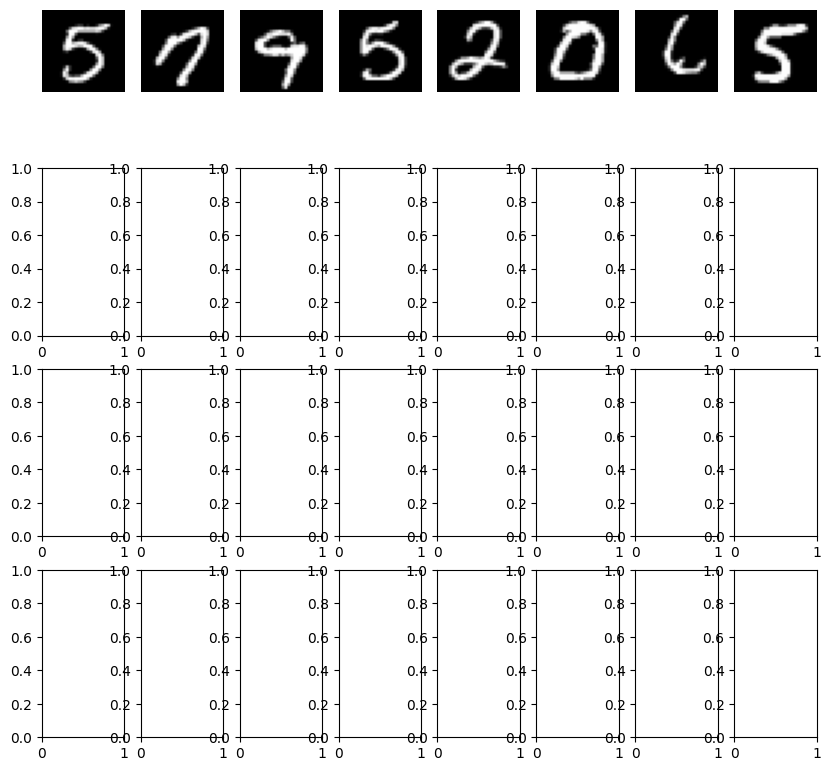

In [69]:
fig, axes = plt.subplots(4, 8, figsize=(10, 10))

for i in range(64):
    ax = axes[i // 32, i % 32]
    ax.imshow(example[i], cmap='gray')
    ax.axis('off')

plt.show()

In [70]:
import torch.nn as nn

In [71]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

In [72]:
input_size = 784
hidden_size = 100
output_size = 10

In [73]:
model = Model(input_size, hidden_size, output_size)


In [74]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0002)

In [75]:
num_epoch = 40
loss_hist = [0] * num_epoch
accuracy_hist = [0] * num_epoch
for epoch in range(num_epoch):
  for example,label in final_train:
    x = example.view(64,784)
    pred = model(x.float())
    one_hot_y = F.one_hot(label, num_classes=10)
    one_hot_y = one_hot_y.squeeze(1)
    loss = loss_fn(pred.float(),one_hot_y.float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist[epoch] += loss.item()*label.size(0)
    is_correct = sum((torch.argmax(pred, dim=1) == label.T.squeeze()).float())
    accuracy_hist[epoch] += is_correct
  loss_hist[epoch] /= len(final_train.dataset)
  accuracy_hist[epoch] /= len(final_train.dataset)
  print(f'Epoch {epoch} Loss {loss_hist[epoch]:.4f} Acc {accuracy_hist[epoch]:.4f}')




Epoch 0 Loss 2.0556 Acc 0.6089
Epoch 1 Loss 1.7861 Acc 0.7926
Epoch 2 Loss 1.6774 Acc 0.8822
Epoch 3 Loss 1.6209 Acc 0.9052
Epoch 4 Loss 1.5951 Acc 0.9149
Epoch 5 Loss 1.5806 Acc 0.9186
Epoch 6 Loss 1.5691 Acc 0.9236
Epoch 7 Loss 1.5612 Acc 0.9271
Epoch 8 Loss 1.5551 Acc 0.9321
Epoch 9 Loss 1.5509 Acc 0.9331
Epoch 10 Loss 1.5446 Acc 0.9364
Epoch 11 Loss 1.5405 Acc 0.9391
Epoch 12 Loss 1.5377 Acc 0.9411
Epoch 13 Loss 1.5354 Acc 0.9431
Epoch 14 Loss 1.5318 Acc 0.9445
Epoch 15 Loss 1.5305 Acc 0.9454
Epoch 16 Loss 1.5276 Acc 0.9480
Epoch 17 Loss 1.5258 Acc 0.9482
Epoch 18 Loss 1.5232 Acc 0.9506
Epoch 19 Loss 1.5220 Acc 0.9502
Epoch 20 Loss 1.5217 Acc 0.9524
Epoch 21 Loss 1.5196 Acc 0.9531
Epoch 22 Loss 1.5174 Acc 0.9542
Epoch 23 Loss 1.5170 Acc 0.9555
Epoch 24 Loss 1.5139 Acc 0.9559
Epoch 25 Loss 1.5134 Acc 0.9575
Epoch 26 Loss 1.5125 Acc 0.9583
Epoch 27 Loss 1.5118 Acc 0.9585
Epoch 28 Loss 1.5102 Acc 0.9595
Epoch 29 Loss 1.5091 Acc 0.9608
Epoch 30 Loss 1.5077 Acc 0.9614
Epoch 31 Loss 1.50

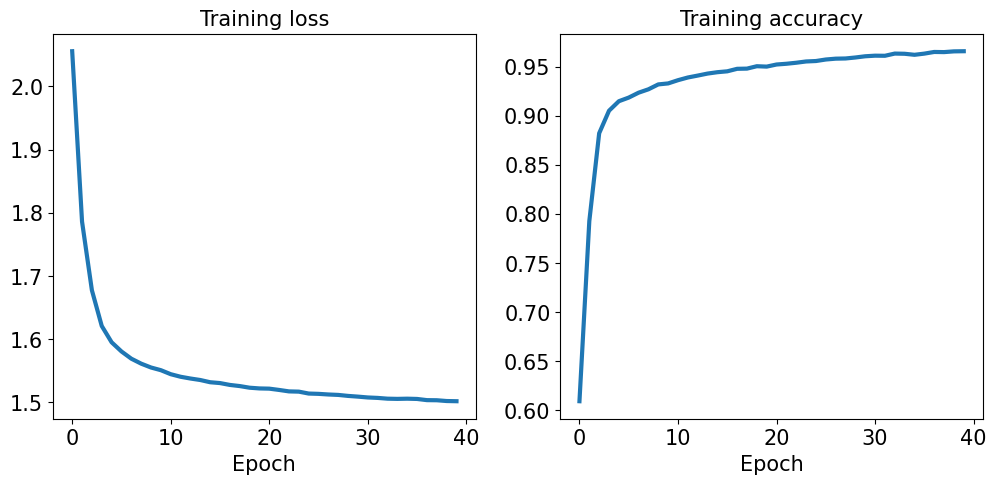

In [79]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)


ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [80]:
y_pred_test = model(test_set_res.view(test_set_res.shape[0],784).float())

In [81]:
pred_label_test = torch.argmax(y_pred_test,dim =1)
pred_label_test.shape
pred_label_test.reshape(-1,1)
accu = torch.sum(pred_label_test.T == label_test.T).float()
accu /= test_set_res.shape[0]

print("Test_accuracy: ",accu.item())

Test_accuracy:  0.9427942633628845


In [83]:
path = 'mnist_classification.pt'
torch.save(model, path)

In [84]:
model_new = torch.load(path)

model_new.eval()

Model(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=10, bias=True)
)

In [91]:
path = 'mnist_classification_parem.pt'
torch.save(model.state_dict(), path)

In [92]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

<All keys matched successfully>